In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
# Importing dataset
dfhousing = pd.read_csv(r'/content/sample_data/train.csv')
dfhousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
dfhousing.shape

(1460, 81)

In [70]:
dfhousing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
# Checking of Dataset
# Null Values column wise
round(100*(dfhousing.isnull().sum()/len(dfhousing)), 2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [73]:
# check for null values in all categorical columns
dfhousing.select_dtypes(include='object').isnull().sum()[dfhousing.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [74]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    dfhousing[col]=dfhousing[col].fillna('None')

In [75]:
def cat_col_value():
    column = []
    cat_columns = dfhousing.select_dtypes(include=['object'])
    for col in (cat_columns):
        if(dfhousing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = cat_col_value()

# Remove the columns with skewed data

dfhousing.drop(columnsToBeRemoved, axis = 1, inplace = True)

dfhousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [76]:
dfhousing.select_dtypes(include='object').isnull().sum()[dfhousing.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [77]:
dfhousing.select_dtypes(include=['int64','float']).isnull().sum()[dfhousing.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [78]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns
dfhousing['LotFrontage'] = dfhousing['LotFrontage'].replace(np.nan, dfhousing['LotFrontage'].median())
dfhousing['MasVnrArea'] = dfhousing['MasVnrArea'].replace(np.nan, dfhousing['MasVnrArea'].median())

In [79]:
# Setting the null values with 0 for GarageYrBlt 
dfhousing['GarageYrBlt']=dfhousing['GarageYrBlt'].fillna(0)
dfhousing['GarageYrBlt'] =dfhousing['GarageYrBlt'].astype(int)

In [80]:
# Create a new column named Age and determine the age of the building at the time of selling

def Age(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
dfhousing['Age'] = dfhousing.apply(Age, axis=1)
dfhousing.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,8


In [81]:
def garage_age(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
dfhousing['OldOrNewGarage'] = dfhousing['GarageYrBlt'].apply(garage_age)
dfhousing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Age,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,8,1


In [82]:
dfhousing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt','MoSold'], axis = 1, inplace = True)

In [83]:
def num_col_value():
    column = []
    num_columns = dfhousing.select_dtypes(include=['int64', 'float'])
    for col in (num_columns):
        if(dfhousing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = num_col_value()
dfhousing.drop(columnsToBeRemoved, axis = 1, inplace = True)
dfhousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Age,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,RFn,2,548,0,61,None,Normal,208500,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,RFn,2,460,298,0,None,Normal,181500,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,RFn,2,608,0,42,None,Normal,223500,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Unf,3,642,0,35,None,Abnorml,140000,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,RFn,3,836,192,84,None,Normal,250000,8,1


In [84]:
# check for percentage of null values in each column
round(100*(dfhousing.isnull().sum()/len(dfhousing.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
GrLivArea         0.0
BsmtFullBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
Fence             0.0
SaleCondition     0.0
SalePrice 

In [85]:
# Check if there are any duplicate values in the dataset
dfhousing[dfhousing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Age,OldOrNewGarage


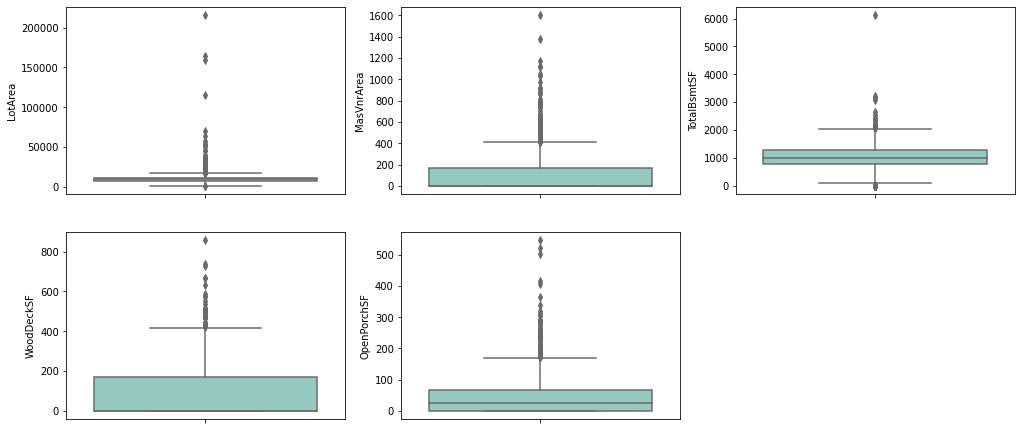

In [86]:
 #Check the outliers in all the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = dfhousing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = dfhousing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = dfhousing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = dfhousing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = dfhousing)
plt.show()

In [87]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = dfhousing['LotArea'].quantile(0.98)
dfhousing = dfhousing[dfhousing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = dfhousing['MasVnrArea'].quantile(0.98)
dfhousing = dfhousing[dfhousing["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = dfhousing['TotalBsmtSF'].quantile(0.99)
dfhousing = dfhousing[dfhousing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = dfhousing['WoodDeckSF'].quantile(0.99)
dfhousing = dfhousing[dfhousing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = dfhousing['OpenPorchSF'].quantile(0.99)
dfhousing = dfhousing[dfhousing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [88]:
# Determine the percentage of data retained
round(100*(len(dfhousing)/1460),2)

93.01

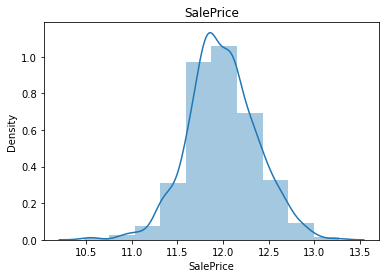

In [89]:
# Visualise the target variable -> SalePrice after transforming the sales price

dfhousing['SalePrice'] = np.log1p(dfhousing['SalePrice'])

plt.title('SalePrice')
sns.distplot(dfhousing['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

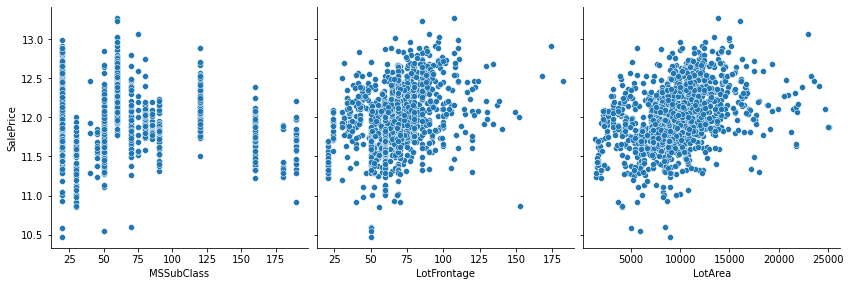

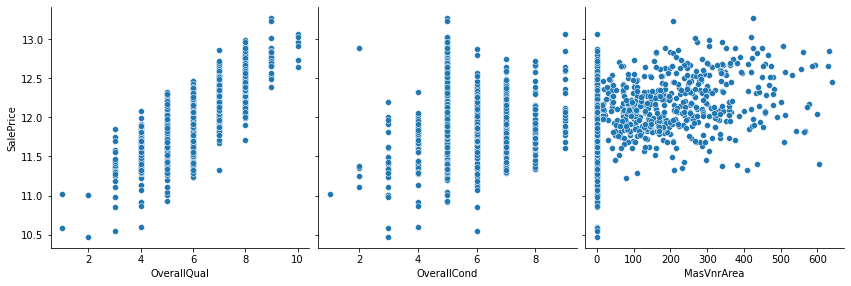

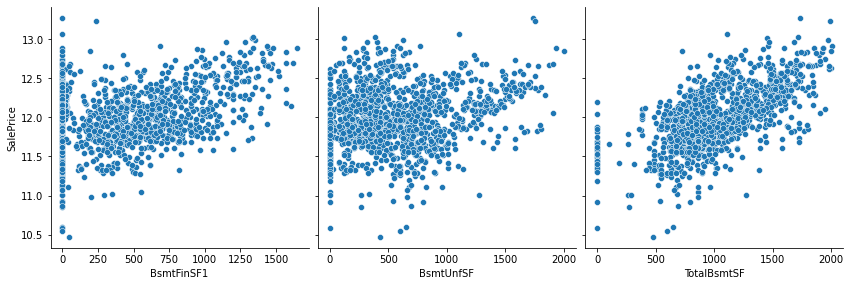

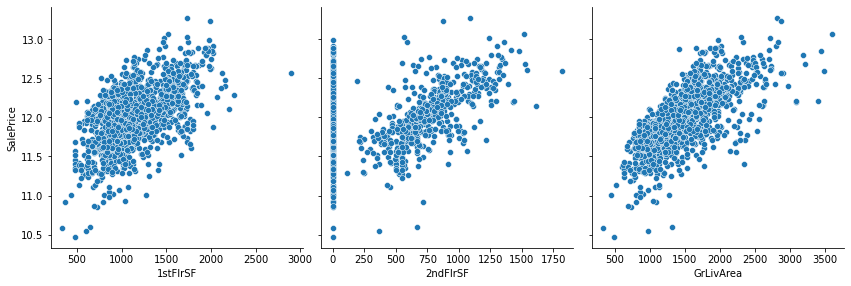

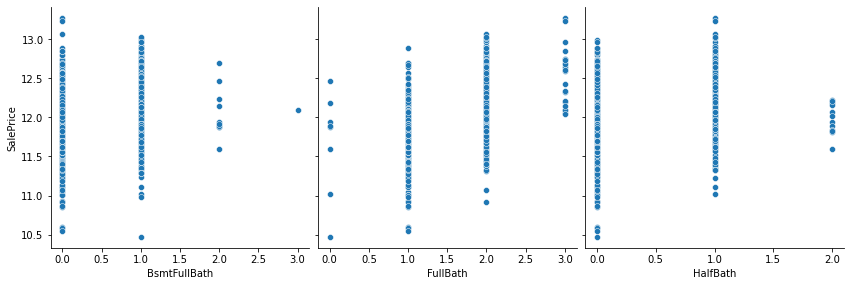

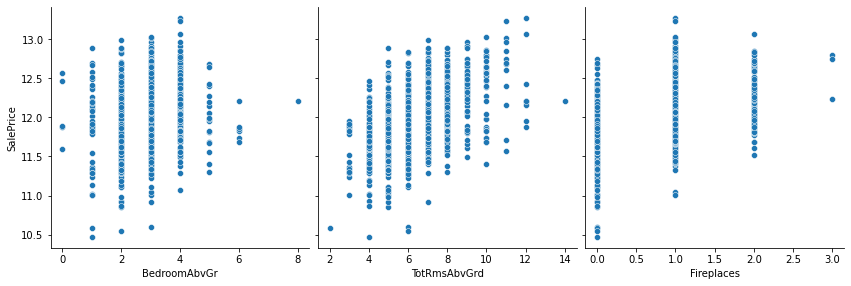

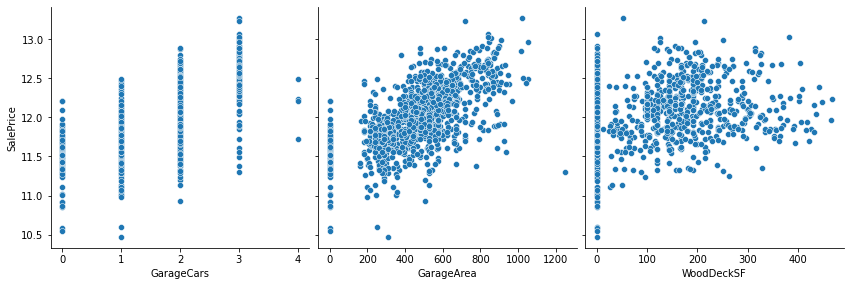

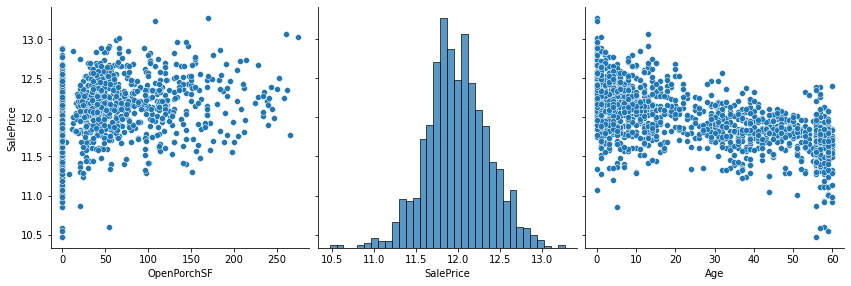

In [90]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(dfhousing, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dfhousing, x_vars=['OpenPorchSF','SalePrice','Age'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

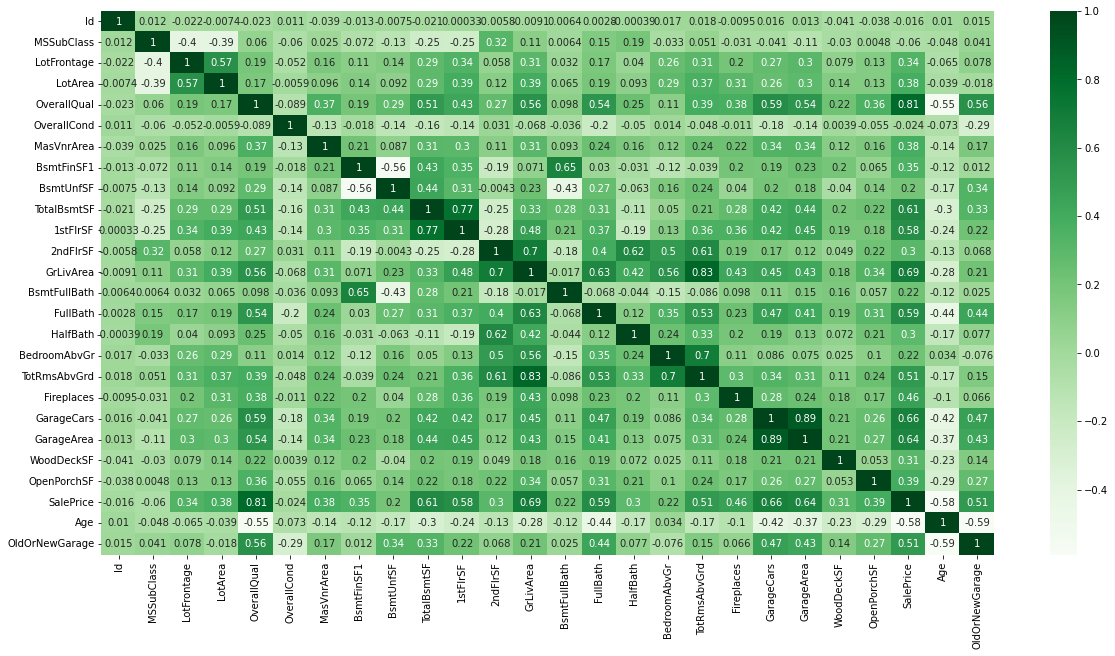

In [91]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(dfhousing.corr(), annot = True, cmap="Greens")
plt.show()

In [92]:
# Removing the highly correlated variables

dfhousing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [93]:
dfhousing.shape

(1358, 46)

In [94]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

dfhousing['d_LotShape'] = dfhousing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
dfhousing['d_ExterQual'] = dfhousing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
dfhousing['d_BsmtQual'] = dfhousing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dfhousing['d_BsmtExposure'] = dfhousing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
dfhousing['d_BsmtFinType1'] = dfhousing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})                                          
dfhousing['d_HeatingQC'] = dfhousing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dfhousing['d_KitchenQual'] = dfhousing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dfhousing['d_FireplaceQu'] = dfhousing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dfhousing['d_GarageFinish'] = dfhousing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
dfhousing['d_BldgType'] = dfhousing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1,'None': 0})                             
dfhousing['d_HouseStyle'] = dfhousing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,'1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })                                                                 
dfhousing['d_Fence'] = dfhousing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
dfhousing['d_LotConfig'] = dfhousing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,'None': 0  })                                                  
dfhousing['d_MasVnrType'] = dfhousing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
dfhousing['d_SaleCondition'] = dfhousing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0, 'None': 0})
dfhousing.head() 
                                                                   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [95]:
dfhousing = dfhousing.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC','KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence','LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)
dfhousing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [96]:
# For the following columns create dummies

d_MSZoning = pd.get_dummies(dfhousing['MSZoning'], prefix='MSZoning', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(dfhousing['Neighborhood'], prefix='Neighborhood', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(dfhousing['RoofStyle'], prefix='RoofStyle', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(dfhousing['Exterior1st'], prefix='Exterior1st', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(dfhousing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(dfhousing['Foundation'], prefix='Foundation', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(dfhousing['GarageType'], prefix='GarageType', drop_first = True)
dfhousingInfo = pd.concat([dfhousing, d_GarageType], axis = 1)

dfhousing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [97]:
# drop the below columns as we now have new columns derived from these columns
dfhousing = dfhousing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation','GarageType'], axis=1)
dfhousing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,5,4,0,2,1,4,0,5,1,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,5,3,3,2,1,1,0,2,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,5,4,3,2,1,4,0,5,1,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,4,4,4,1,1,4,0,4,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,5,4,3,2,1,4,0,2,1,1


In [98]:
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1358 non-null   int64  
 1   LotFrontage      1358 non-null   float64
 2   LotArea          1358 non-null   int64  
 3   OverallQual      1358 non-null   int64  
 4   OverallCond      1358 non-null   int64  
 5   MasVnrArea       1358 non-null   float64
 6   BsmtFinSF1       1358 non-null   int64  
 7   BsmtUnfSF        1358 non-null   int64  
 8   TotalBsmtSF      1358 non-null   int64  
 9   1stFlrSF         1358 non-null   int64  
 10  2ndFlrSF         1358 non-null   int64  
 11  GrLivArea        1358 non-null   int64  
 12  BsmtFullBath     1358 non-null   int64  
 13  FullBath         1358 non-null   int64  
 14  HalfBath         1358 non-null   int64  
 15  BedroomAbvGr     1358 non-null   int64  
 16  Fireplaces       1358 non-null   int64  
 17  GarageCars    

In [99]:
# Putting all feature variable to X
X = dfhousing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,5,4,0,2,1,4,0,5,1,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,5,3,3,2,1,1,0,2,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,5,4,3,2,1,4,0,5,1,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,4,4,4,1,1,4,0,4,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,5,4,3,2,1,4,0,2,1,1


In [100]:
# Putting response variable to y
y = dfhousing['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [101]:
# scaling the features

from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'Age', 'OldOrNewGarage', 'd_LotShape', 'd_ExterQual', 'd_BsmtQual',
       'd_BsmtExposure', 'd_BsmtFinType1', 'd_HeatingQC', 'd_KitchenQual',
       'd_FireplaceQu', 'd_GarageFinish', 'd_BldgType', 'd_HouseStyle',
       'd_Fence', 'd_LotConfig', 'd_MasVnrType', 'd_SaleCondition'],
      dtype='object')

In [102]:
# split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [103]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [104]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
5,MasVnrArea,True,1
6,BsmtFinSF1,True,1
7,BsmtUnfSF,True,1
8,TotalBsmtSF,True,1
9,1stFlrSF,True,1


In [105]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [106]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,50,-0.091003,-0.095187,1
24,100,-0.091501,-0.095257,2
22,20,-0.090811,-0.095318,3
21,10.0,-0.090784,-0.095397,4
20,9.0,-0.090782,-0.095409,5
19,8.0,-0.090781,-0.095421,6
18,7.0,-0.090780,-0.095433,7
17,6.0,-0.090781,-0.095445,8
16,5.0,-0.090782,-0.095457,9
15,4.0,-0.090784,-0.095471,10


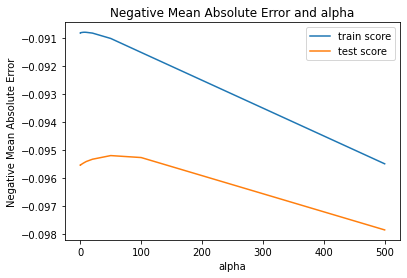

In [108]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [109]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=50)

In [110]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02336313,  0.00538346,  0.022959  ,  0.08361026,  0.04171713,
        0.00513576,  0.02762194, -0.01270309,  0.05353059,  0.0433652 ,
        0.03146046,  0.04343477,  0.00801675,  0.02432641,  0.03237445,
        0.00040629,  0.01961332,  0.03298676,  0.00929257,  0.00685944,
       -0.01840629,  0.02370677, -0.00706096,  0.01823061,  0.00256323,
        0.01211563,  0.01076472,  0.01847779,  0.01720673,  0.00768801,
        0.02018494,  0.00587064,  0.00946274,  0.00030934,  0.00068202,
       -0.00226425,  0.0185323 ])

In [111]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01507988570950039

In [112]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0234
1,LotFrontage,0.0054
2,LotArea,0.0230
3,OverallQual,0.0836
4,OverallCond,0.0417
5,MasVnrArea,0.0051
6,BsmtFinSF1,0.0276
7,BsmtUnfSF,-0.0127
8,TotalBsmtSF,0.0535
9,1stFlrSF,0.0434


In [113]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0234,
 'LotFrontage': 0.0054,
 'LotArea': 0.023,
 'OverallQual': 0.0836,
 'OverallCond': 0.0417,
 'MasVnrArea': 0.0051,
 'BsmtFinSF1': 0.0276,
 'BsmtUnfSF': -0.0127,
 'TotalBsmtSF': 0.0535,
 '1stFlrSF': 0.0434,
 '2ndFlrSF': 0.0315,
 'GrLivArea': 0.0434,
 'BsmtFullBath': 0.008,
 'FullBath': 0.0243,
 'HalfBath': 0.0324,
 'BedroomAbvGr': 0.0004,
 'Fireplaces': 0.0196,
 'GarageCars': 0.033,
 'WoodDeckSF': 0.0093,
 'OpenPorchSF': 0.0069,
 'Age': -0.0184,
 'OldOrNewGarage': 0.0237,
 'd_LotShape': -0.0071,
 'd_ExterQual': 0.0182,
 'd_BsmtQual': 0.0026,
 'd_BsmtExposure': 0.0121,
 'd_BsmtFinType1': 0.0108,
 'd_HeatingQC': 0.0185,
 'd_KitchenQual': 0.0172,
 'd_FireplaceQu': 0.0077,
 'd_GarageFinish': 0.0202,
 'd_BldgType': 0.0059,
 'd_HouseStyle': 0.0095,
 'd_Fence': 0.0003,
 'd_LotConfig': 0.0007,
 'd_MasVnrType': -0.0023,
 'd_SaleCondition': 0.0185}

In [114]:
##RFE
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [115]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.0836
5,TotalBsmtSF,True,1,0.0535
6,1stFlrSF,True,1,0.0434
8,GrLivArea,True,1,0.0434
2,OverallCond,True,1,0.0417
10,GarageCars,True,1,0.0330
7,2ndFlrSF,True,1,0.0315
3,BsmtFinSF1,True,1,0.0276
12,OldOrNewGarage,True,1,0.0237
0,LotArea,True,1,0.0230


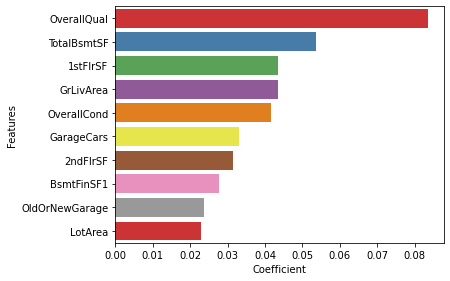

In [116]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [117]:
##Lasso
lasso = Lasso()

# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds, return_train_score=True,verbose = 1)                             
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.004,-0.090915,-0.094978,1
7,0.003,-0.090902,-0.094993,2
9,0.005,-0.090993,-0.094996,3
6,0.002,-0.090925,-0.095110,4
5,0.001,-0.090824,-0.095222,5
4,0.0005,-0.090712,-0.095346,6
3,0.0004,-0.090722,-0.095378,7
2,0.0003,-0.090734,-0.095408,8
1,0.0002,-0.090751,-0.095448,9
0,0.0001,-0.090774,-0.095487,10


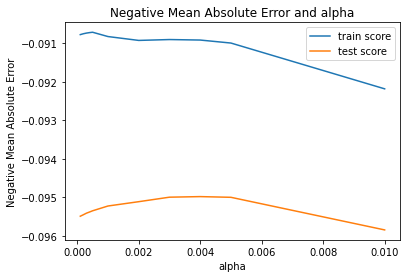

In [119]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [120]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.004)

In [121]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-2.00611724e-02,  4.79919065e-03,  2.26457210e-02,  8.59514868e-02,
        4.14625470e-02,  3.52913503e-03,  2.74797378e-02, -1.31983550e-02,
        5.50628103e-02,  3.89394238e-02,  2.61254944e-02,  4.89150757e-02,
        7.63536684e-03,  2.41531916e-02,  3.28432259e-02, -0.00000000e+00,
        1.97143917e-02,  3.31540784e-02,  9.09672212e-03,  6.29813930e-03,
       -1.85877554e-02,  2.32294652e-02, -6.72719897e-03,  1.79065733e-02,
        1.36091379e-03,  1.18705914e-02,  1.05414947e-02,  1.83232653e-02,
        1.69499658e-02,  6.94321870e-03,  2.00850375e-02,  2.29469493e-03,
        8.03622199e-03,  0.00000000e+00,  6.66182845e-05, -2.43642836e-04,
        1.83981294e-02])

In [122]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.015083877231558794

In [123]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0201
1,LotFrontage,0.0048
2,LotArea,0.0226
3,OverallQual,0.0860
4,OverallCond,0.0415
5,MasVnrArea,0.0035
6,BsmtFinSF1,0.0275
7,BsmtUnfSF,-0.0132
8,TotalBsmtSF,0.0551
9,1stFlrSF,0.0389


In [124]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.020061172417171456,
 'LotFrontage': 0.004799190649182539,
 'LotArea': 0.02264572099735164,
 'OverallQual': 0.08595148676076934,
 'OverallCond': 0.04146254695505876,
 'MasVnrArea': 0.00352913502748887,
 'BsmtFinSF1': 0.027479737824896933,
 'BsmtUnfSF': -0.013198355007728575,
 'TotalBsmtSF': 0.055062810300436624,
 '1stFlrSF': 0.038939423794971485,
 '2ndFlrSF': 0.02612549438044347,
 'GrLivArea': 0.0489150756554311,
 'BsmtFullBath': 0.007635366836619921,
 'FullBath': 0.024153191617406426,
 'HalfBath': 0.03284322586195645,
 'BedroomAbvGr': -0.0,
 'Fireplaces': 0.01971439171331889,
 'GarageCars': 0.033154078379040504,
 'WoodDeckSF': 0.009096722118795296,
 'OpenPorchSF': 0.006298139303963156,
 'Age': -0.018587755389593775,
 'OldOrNewGarage': 0.02322946516495832,
 'd_LotShape': -0.006727198966257921,
 'd_ExterQual': 0.01790657328927124,
 'd_BsmtQual': 0.00136091378971147,
 'd_BsmtExposure': 0.011870591388700355,
 'd_BsmtFinType1': 0.010541494708472954,
 'd_HeatingQC': 0.01832

In [125]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm,n_features_to_select= 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [126]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.085951
5,TotalBsmtSF,True,1,0.055063
8,GrLivArea,True,1,0.048915
2,OverallCond,True,1,0.041463
6,1stFlrSF,True,1,0.038939
10,GarageCars,True,1,0.033154
3,BsmtFinSF1,True,1,0.027480
7,2ndFlrSF,True,1,0.026125
12,OldOrNewGarage,True,1,0.023229
0,LotArea,True,1,0.022646


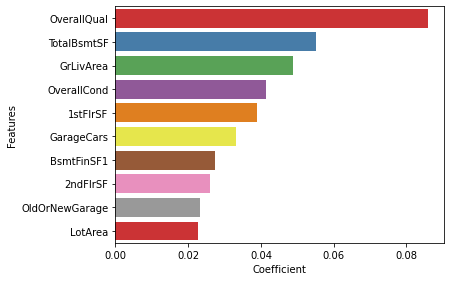

In [127]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()